In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
df=pd.read_csv('train_ex4.csv')

MSSubClass : класс здания \
MSZoning : Общая классификация зонирования \
LotFrontage : Линейные футы улицы, соединенной с недвижимостью \
LotArea : Размер участка в квадратных футах \
Street : Тип подъездной дороги \
Alley : Тип доступа к аллее \
LotShape : Общая форма объекта \
LandContour : Плоскостность участка \
Utilities : Тип доступных утилит \
LotConfig : конфигурация лота \
LandSlope : Уклон участка \
Neighborhood : Физические местоположения в черте города Эймс \
Condition1 : Близость к главной дороге или железной дороге \
Condition2: близость к главной дороге или железной дороге (при наличии второй) \
BldgType : Тип жилья \
HouseStyle : стиль жилья \
OverallQual : общее качество материала и отделки \
OverallCond : общая оценка состояния \
YearBuilt : Первоначальная дата постройки \
YearRemodAdd : Дата ремоделирования \
RoofStyle : Тип крыши \
RoofMatl : Материал крыши \
Exterior1st : Наружное покрытие дома \ 
Exterior2nd : Внешнее покрытие дома (если более одного материала) \
MasVnrType : Тип каменной кладки \
MasVnrArea : Площадь каменной кладки в квадратных футах \
ExterQual : качество материалов экстерьера \
ExterCond : Текущее состояние материала снаружи \
Foundation : Тип фундамента \
BsmtQual : Высота подвала \
BsmtCond : Общее состояние подвала \
BsmtExposure : Стены подвала на уровне сада или выхода \
BsmtFinType1 : Качество отделки цокольного этажа \
BsmtFinSF1 : тип 1 готовых квадратных футов \
BsmtFinType2 : Качество второй готовой области (если присутствует) \
BsmtFinSF2 : тип 2 готовых квадратных футов \
BsmtUnfSF : Незавершенные квадратные футы подвального помещения \
TotalBsmtSF : Общая площадь подвала в квадратных футах \
Heating : Тип отопления \
HeatingQC : Качество и состояние отопления \
CentralAir : Центральное кондиционирование воздуха \
Electrical : Электрическая система \
1stFlrSF : Квадратные футы первого этажа \
2ndFlrSF : Квадратные футы второго этажа \
LowQualFinSF : квадратные футы с отделкой низкого качества (все этажи) \
GrLivArea : жилая площадь над землей в квадратных футах \
BsmtFullBath : Ванные комнаты в подвале \
BsmtHalfBath : Половина ванных комнат в подвале \
FullBath : полностью оборудованные ванные комнаты выше уровня земли \
HalfBath : полуванны выше уровня земли \
Bedroom : Количество спален над цокольным этажом \
Kitchen : Количество кухонь \
KitchenQual : Качество кухни \
TotRmsAbvGrd : Общее количество комнат выше класса (не включая ванные комнаты) \
Functional : Рейтинг домашней функциональности \
Fireplaces : Количество каминов \
FireplaceQu : Качество камина \
GarageType : место в гараже \
GarageYrBlt : Год постройки гаража \
GarageFinish : Внутренняя отделка гаража \
GarageCars : Размер гаража по вместимости автомобиля \
GarageArea : Размер гаража в квадратных футах \
GarageQual : качество гаража \
GarageCond : Гаражное состояние \
PavedDrive : Асфальтированная дорога \
WoodDeckSF : площадь деревянной палубы в квадратных футах \
OpenPorchSF : площадь открытого крыльца в квадратных футах \
EnclosedPorch : закрытая площадь крыльца в квадратных футах \
3SsnPorch : площадь крыльца для трех сезонов в квадратных футах \
ScreenPorch : Площадь крыльца экрана в квадратных футах \
PoolArea : площадь бассейна в квадратных футах \
PoolQC : качество пула \
Fence : Качество забора \
MiscFeature : Разная функция, не включенная в другие категории \
MiscVal : $Значение различных функций \
MoSold : Месяц продажи \
YrSold : Год продажи \
SaleType : Тип продажи \
SaleCondition : Состояние продажи \
SalePrice : цена продажи недвижимости в долларах. Это целевая переменная, которую вы пытаетесь предсказать \

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

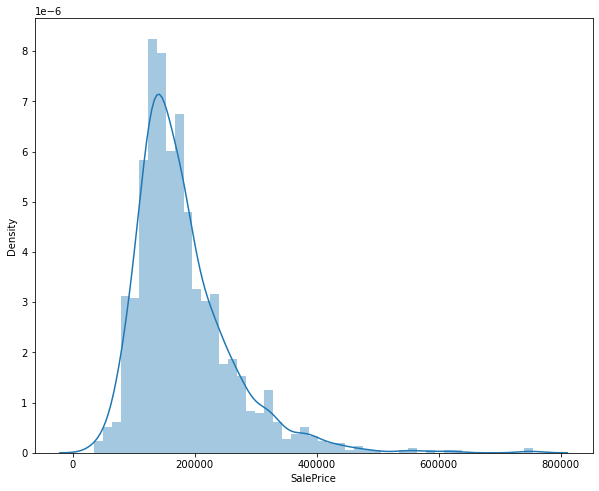

In [6]:
plt.subplots(figsize=(10,8))
sns.distplot(df['SalePrice'])

In [7]:
df.isnull().sum().sort_values(ascending=False).head(30)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
TotRmsAbvGrd       0
GarageCars         0
dtype: int64

## Поработаем со столбцами, где обнаружены пропущенные значения

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.drop(['Alley', 'PoolQC', 'MiscFeature', 'Fence'], axis=1, inplace=True)

In [10]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [11]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [12]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [13]:
df.drop(['GarageYrBlt'], axis=1, inplace=True)

In [14]:
df.isnull().sum().sort_values(ascending=False).head(10)

BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
MasVnrType       8
MasVnrArea       8
Electrical       1
Id               0
BedroomAbvGr     0
Functional       0
TotRmsAbvGrd     0
dtype: int64

In [15]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(1451, 76)

## Преобразуем категориальные переменные

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuil

In [19]:
cat_columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
             'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
            'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
            'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',
            'GarageCond','PavedDrive','SaleType','SaleCondition']

In [20]:
len(cat_columns)

39

In [21]:
df_dummy = pd.get_dummies(data=df[['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                                   'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
                                   'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
                                   'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                                   'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',
                                   'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType',
                                   'SaleCondition']], drop_first = True)

In [22]:
houses_df=pd.concat([df.drop(['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                                'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
                                'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
                                'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                                'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
                                'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                                'PavedDrive','SaleType','SaleCondition'], axis='columns'),df_dummy],axis=1)

In [23]:
houses_df.shape

(1451, 237)

## Строим модель

In [24]:
X = houses_df.drop(['SalePrice', 'Id'], axis=1)
y = np.log(houses_df['SalePrice'])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')

MSE: 0.0433
MAE: 0.0939


In [36]:
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}')
print(f'R^2: {r2_score(y_test, y_pred):.4f}')

MAPE: 0.0079
R^2: 0.7190


In [35]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge()
lasso = Lasso()

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

print(f'MSE (Ridge): {mean_squared_error(y_test, ridge.predict(X_test))}')
print(f'MAE (Ridge): {mean_absolute_error(y_test, ridge.predict(X_test))}')
print(f'MAPE (Ridge): {mean_absolute_percentage_error(y_test, ridge.predict(X_test))}')
print(f'R^2 (Ridge): {r2_score(y_test, ridge.predict(X_test))}')

print(f'MSE (Lasso): {mean_squared_error(y_test, lasso.predict(X_test))}')
print(f'MAE (Lasso): {mean_absolute_error(y_test, lasso.predict(X_test))}')
print(f'MAPE (Lasso): {mean_absolute_percentage_error(y_test, lasso.predict(X_test))}')
print(f'R^2 (Lasso): {r2_score(y_test, lasso.predict(X_test))}')


MSE (Ridge): 0.042467118836356524
MAE (Ridge): 0.09294367391404652
MAPE (Ridge): 0.007782145036024564
R^2 (Ridge): 0.7246500669180703
MSE (Lasso): 0.0738713704085167
MAE (Lasso): 0.12815689652610485
MAPE (Lasso): 0.0107009624221092
R^2 (Lasso): 0.521029976697128
